In [1]:
import osmnx as ox
import networkx as nx
import os
import numpy as np
%matplotlib inline

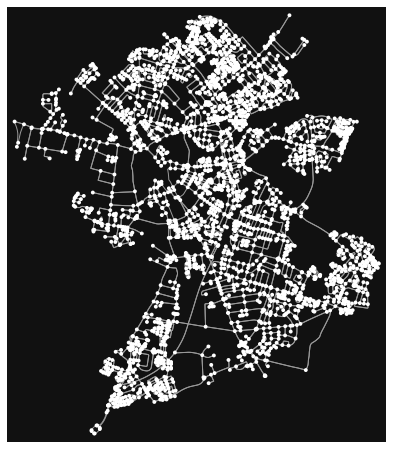

In [2]:
G = ox.graph_from_place('Cambridge, UK', network_type='drive')
fig, ax = ox.plot_graph(ox.project_graph(G))

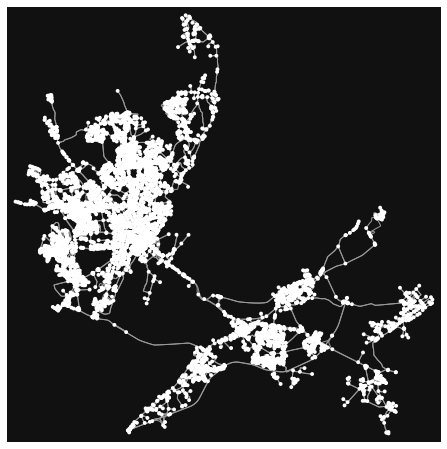

In [3]:
szczecin = ox.graph_from_place('Szczecin', network_type = 'drive')
fig,ax = ox.plot_graph(szczecin)

In [4]:
def save_graph(G, place_name):
    filepath = '../../data/' + place_name + '.graphml'

    if not os.path.exists(filepath):
        ox.save_graphml(G, filepath)

In [5]:
#saving data about my home city

In [6]:
save_graph(szczecin, 'szczecin')

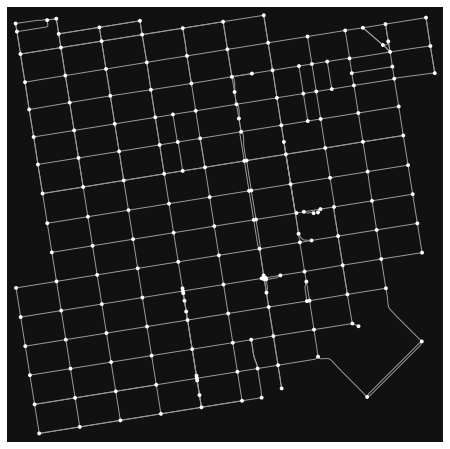

In [7]:
#mostly taken from https://geoffboeing.com/2017/01/square-mile-street-network-visualization/
def save_small_networks():
    G = ox.graph_from_address('350 5th Ave, New York, New York', network_type='drive')
    save_graph(G, 'small_ny')
    
    G = ox.graph_from_point((37.79, -122.41), dist=750, network_type='drive')
    ox.plot_graph(G)
    save_graph(G, 'somewhere')
    
save_small_networks()

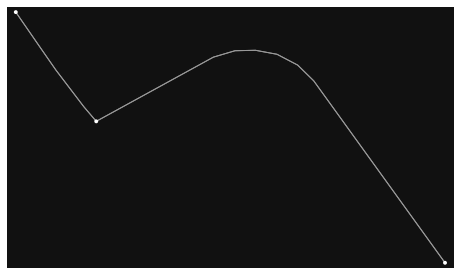

In [8]:
G = ox.graph_from_point((37.60, -122.40), dist=200, network_type='drive')
ox.plot_graph(G)
save_graph(G, 'small_somewhere')

In [13]:
def get_simple_description(graph, mapping):
    edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)
    lengths = edges['length'].values

    edgelist = []
    it = 0
    for edge in graph.edges():
        a = mapping[edge[0]]
        b = mapping[edge[1]]

        edgelist.append((a, b, lengths[it]))
        it += 1

    return edgelist

In [15]:
def save_as_simple_edgelist(graph, place_name, mapping):
    filepath = '../../data/' + place_name + '.txt'
    edgelist = get_simple_description(graph, mapping)
    n = len(graph.nodes())
    
    with open(filepath, 'w') as file:
        file.write(str(n) + ' ' + str(len(edgelist)) + '\n')
        for e in edgelist:
            file.write(str(e[0]) + ' ' + str(e[1]) + ' ' + str(e[2]) + '\n')

In [67]:
def calculate_node_mappings(graph):
    init_to_clear = {}
    clear_to_init = {}
    it = 0
    for u in graph.nodes():
        init_to_clear[u] = it
        clear_to_init[it] = u
        it += 1
        
    return init_to_clear, clear_to_init

In [71]:
def save_shortest_distances(graph, name, rev_map):
    filepath = '../../data/' + name + '_ans.txt'
    n = len(graph.nodes())
    
    with open(filepath, 'w') as file:
        file.write(str(n) + '\n')
        for i in range(n):
            for j in range(n):
                try:
                    dt = nx.shortest_path_length(graph, rev_map[i], rev_map[j], weight='length')
                except nx.NetworkXNoPath:
                    dt = 1000000000.0
                
                file.write(str(dt))
                file.write(' ')
            
            file.write('\n')

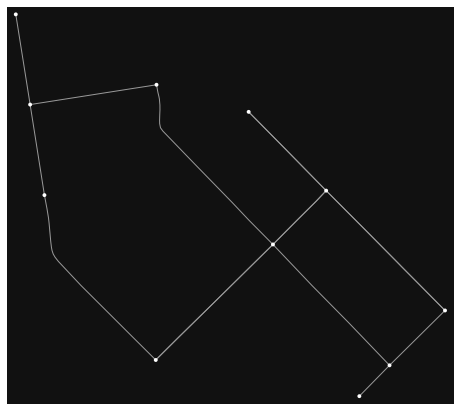

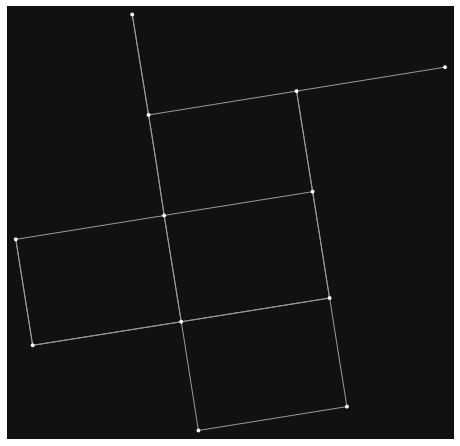

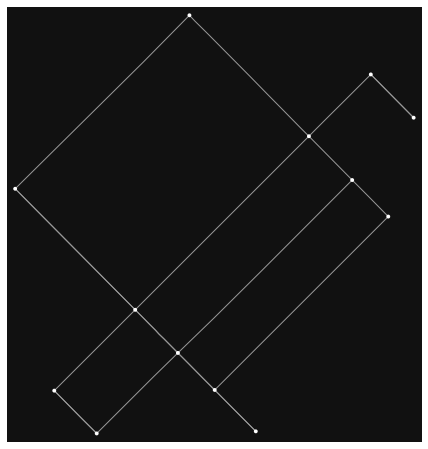

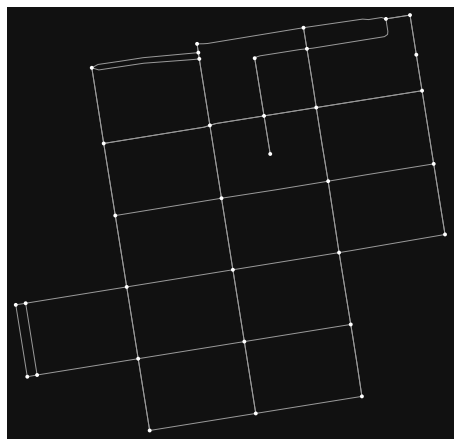

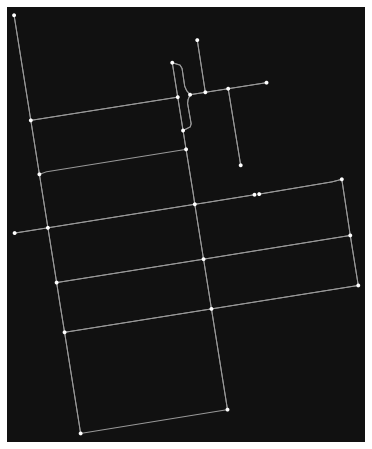

In [72]:
def prepare_small_testcases(num_testcases):
    np.random.seed(42)
    for nt in range(num_testcases):
        name = 'test_' + str(nt)
        #these are new york center coordinates, there should be plenty of roads there
        X = 37.79 + np.random.uniform(-0.01, 0.01)
        Y = -122.41 + np.random.uniform(-0.01, 0.01)
        
        G = ox.graph_from_point((X, Y), dist=np.random.uniform(200, 300), network_type='drive')
        #G = osmnx.utils_graph.get_digraph(G, weight='length')
        mapping, revmap = calculate_node_mappings(G)
        ox.plot_graph(G)
        save_graph(G, name)
        
        save_as_simple_edgelist(G, name, mapping)
        
        save_shortest_distances(G, name, revmap)
        
prepare_small_testcases(5)